In [1]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26, remesh
from helpers.computational_tools import select_NA, select_Pacific, StateFunctions, compare
from helpers.ann_tools import ANN, import_ANN
import numpy as np
%load_ext autoreload
%autoreload 3

In [2]:
ds = DatasetCM26()

In [3]:
%time training_dataset = ds.sample_epoch(time=np.random.randint(8035))

CPU times: user 6.3 s, sys: 2 s, total: 8.3 s
Wall time: 7.87 s


# Comparing prediction by ANN trained on ZB20 data to ZB20 itself

Correlation: 0.9997087636056948
Relative Error: 0.02736019244445345
R2 =  0.9994145803085029
Optinal scaling: 0.9982537521678733
Nans: 0
Correlation: 0.9996166328940063
Relative Error: 0.030915223543601857
R2 =  0.9992333137365965
Optinal scaling: 1.0002947148261978
Nans: 0
Correlation: 0.999514371357225
Relative Error: 0.03327716982108774
R2 =  0.9990238972463648
Optinal scaling: 0.9978036158513413
Nans: 0
Correlation: 0.9994713765294818
Relative Error: 0.03826262773351379
R2 =  0.9989401594168196
Optinal scaling: 1.0013442527418035
Nans: 0
Correlation: 0.9992551504536404
Relative Error: 0.04235037883473049
R2 =  0.9985061581837547
Optinal scaling: 1.0025083041808822
Nans: 0
Correlation: 0.9993799298917738
Relative Error: 0.03584985829313727
R2 =  0.9988485137207356
Optinal scaling: 1.0021224659147445
Nans: 0
Correlation: 0.9993342687992028
Relative Error: 0.03589974751051285
R2 =  0.9987912500584942
Optinal scaling: 0.9988283662092985
Nans: 0
Correlation: 0.9987509992134109
Relative 

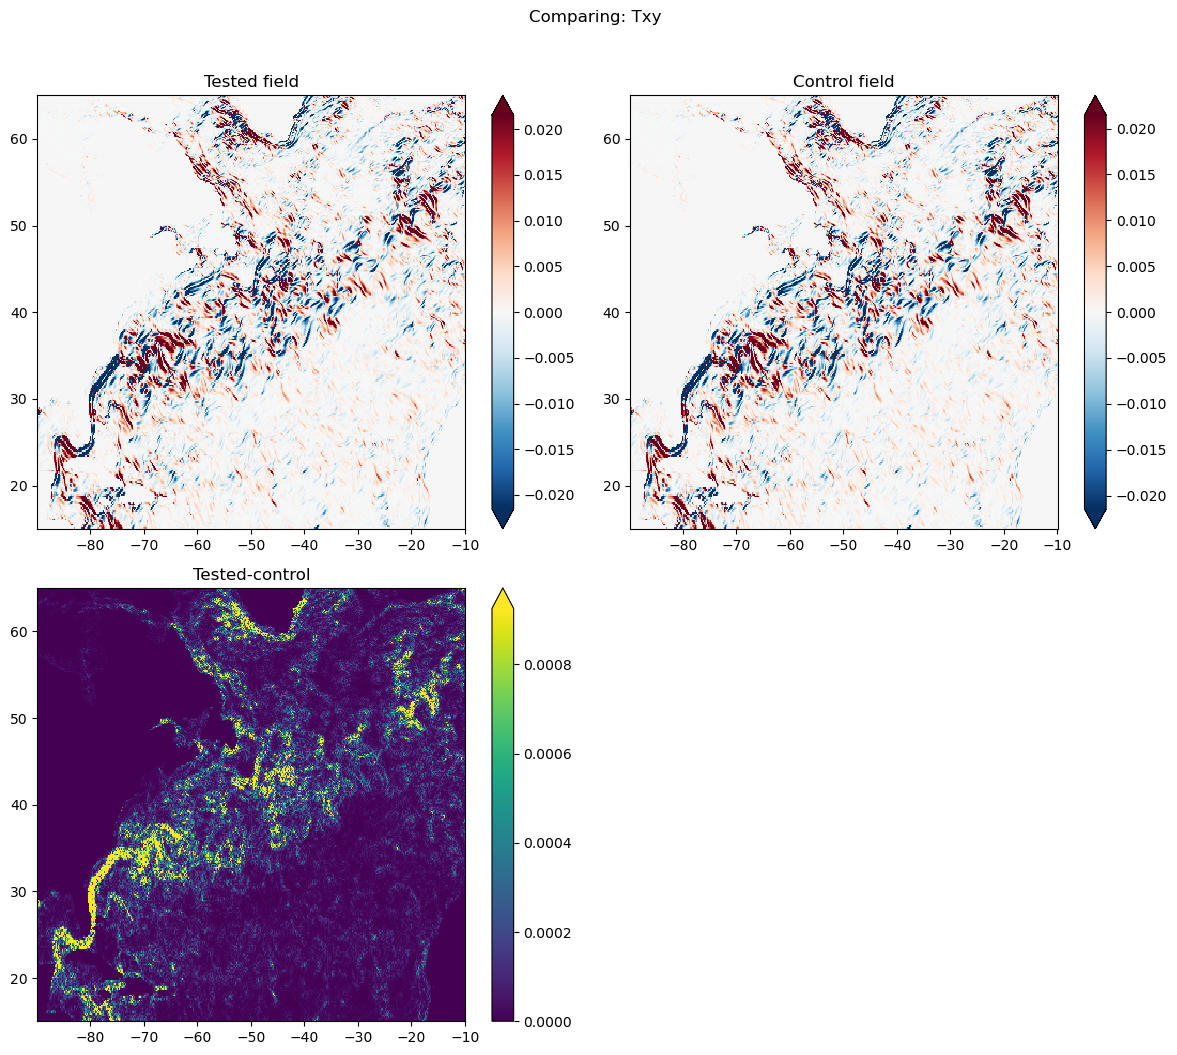

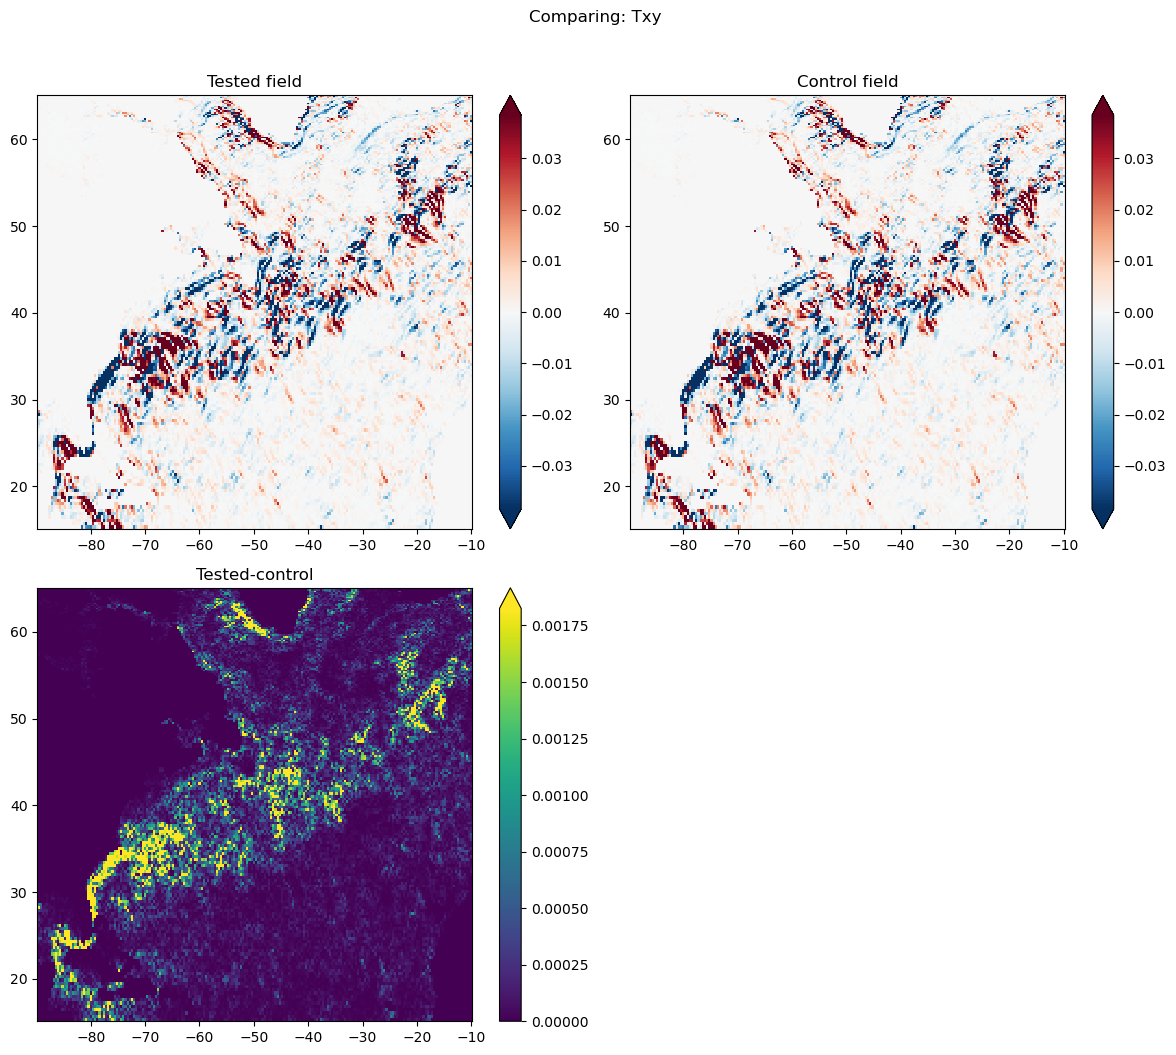

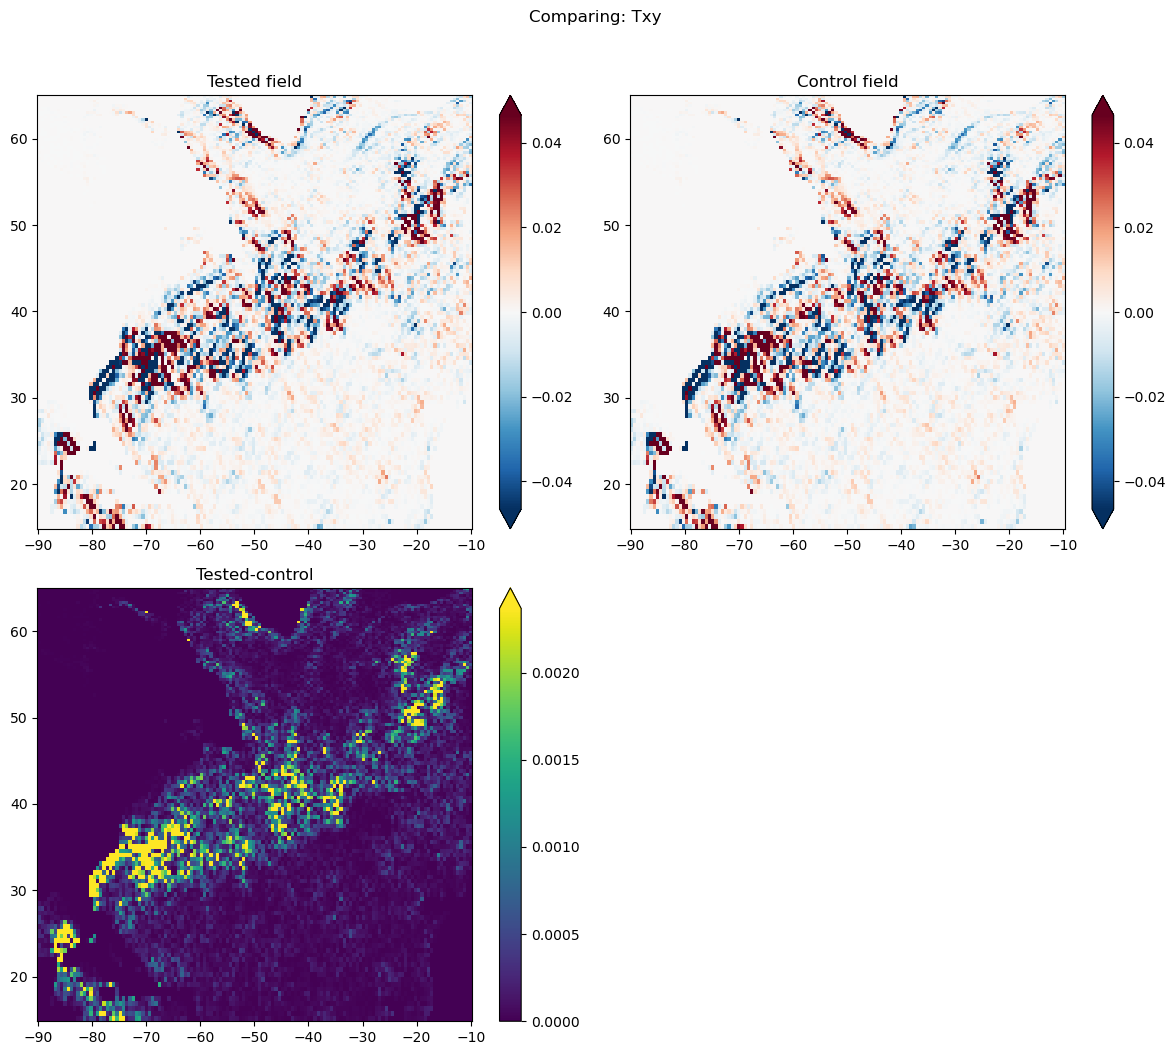

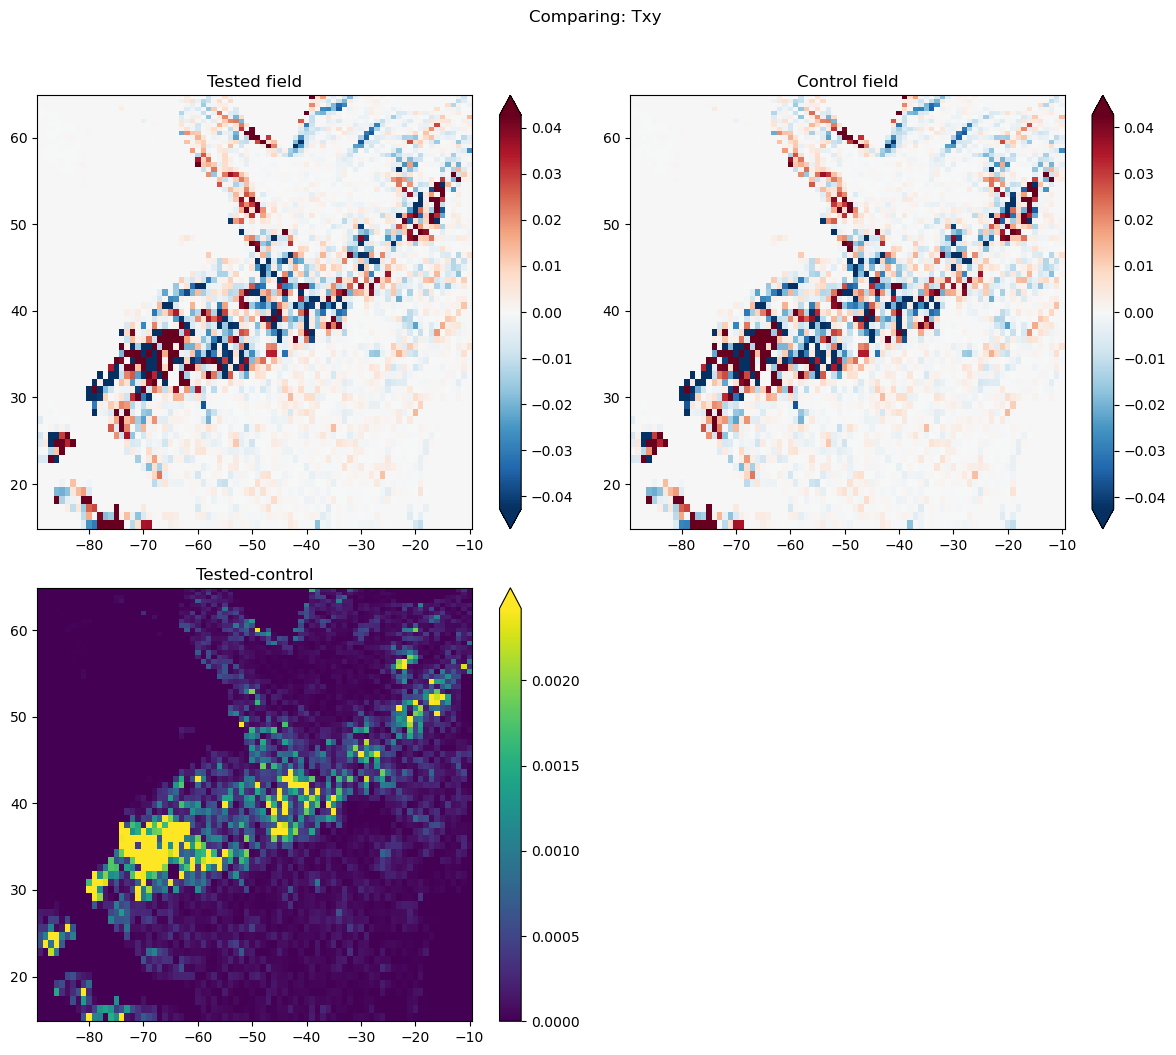

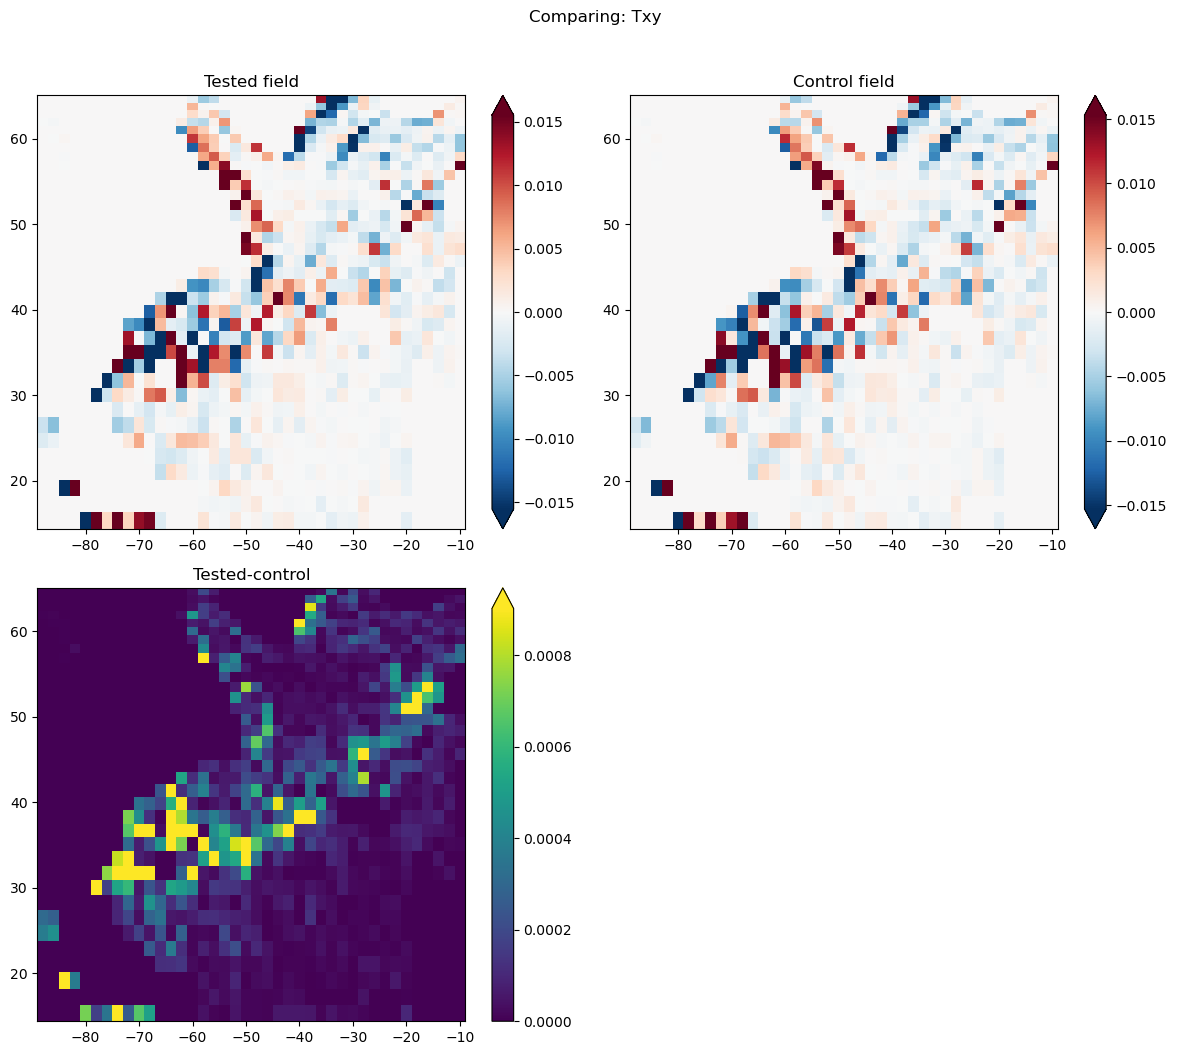

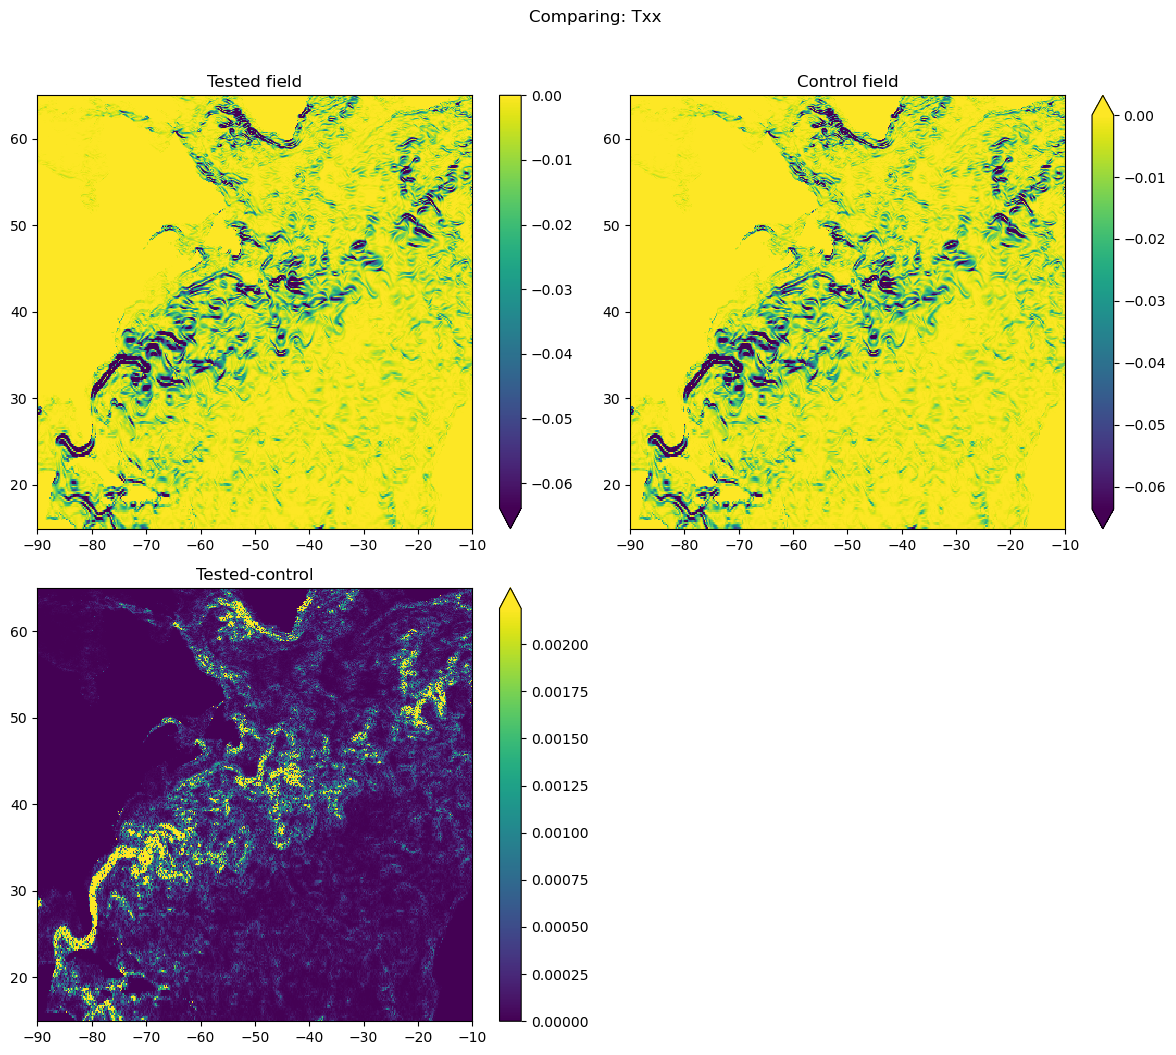

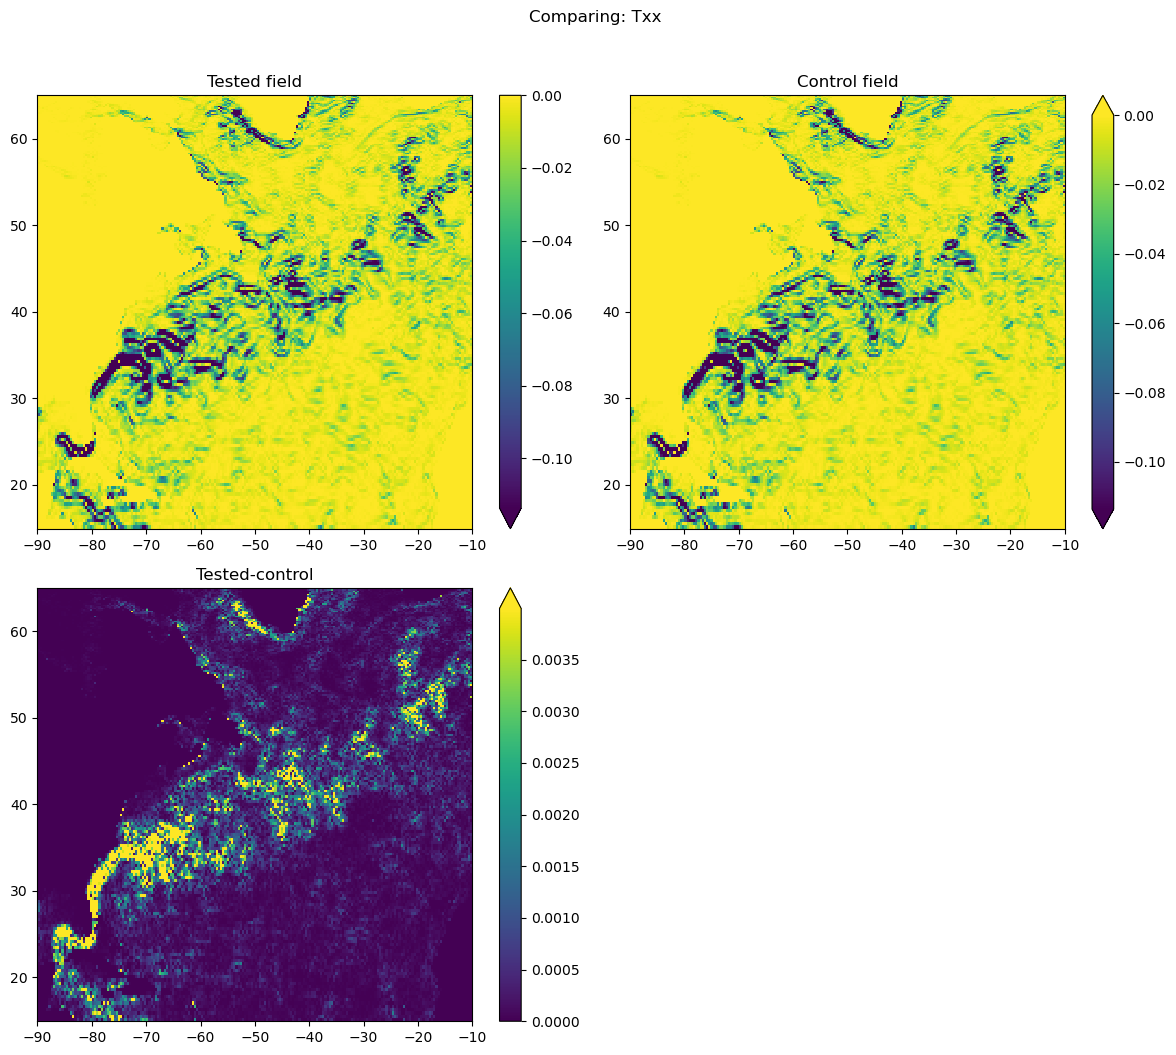

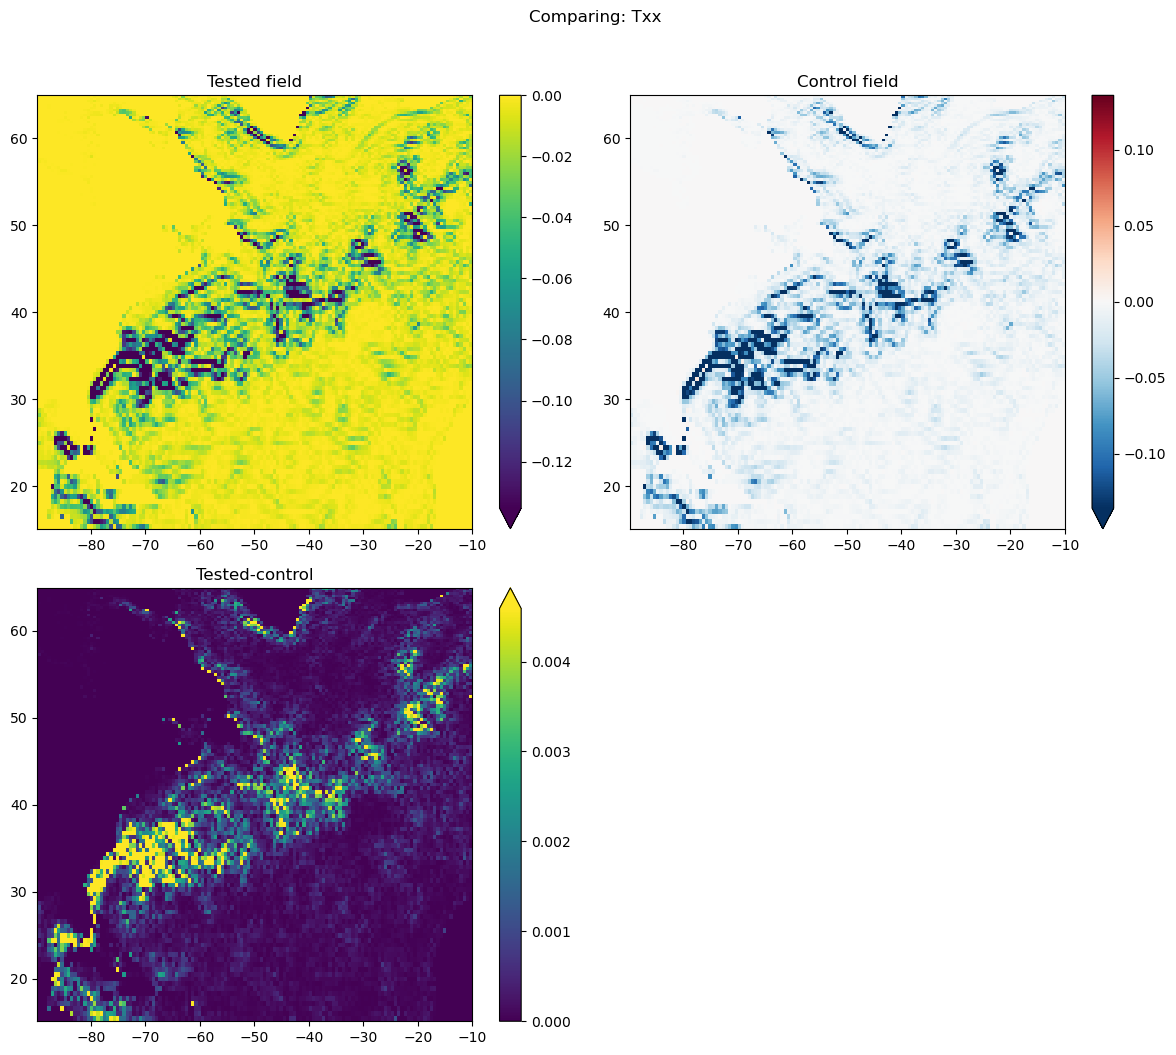

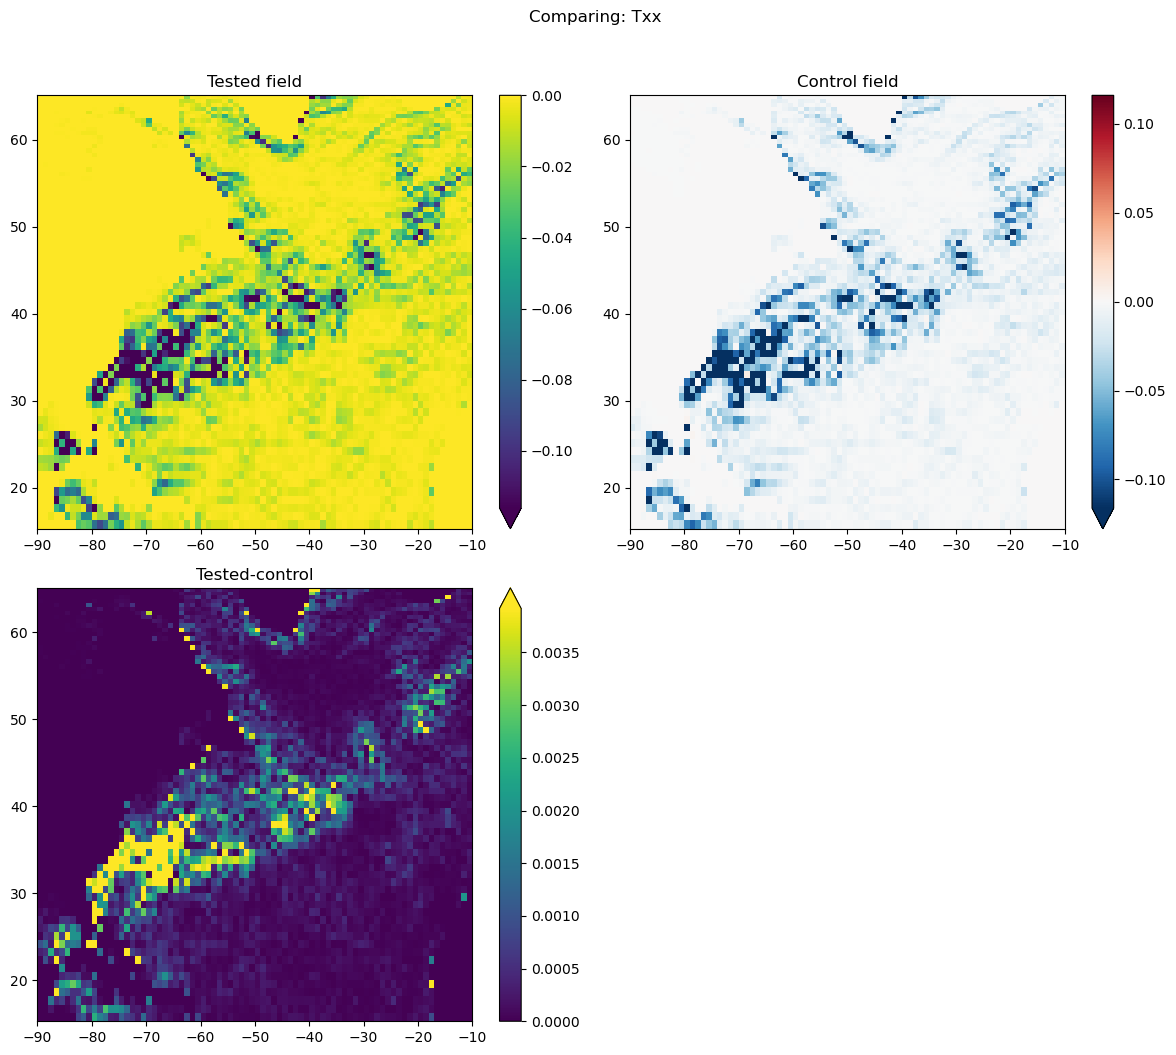

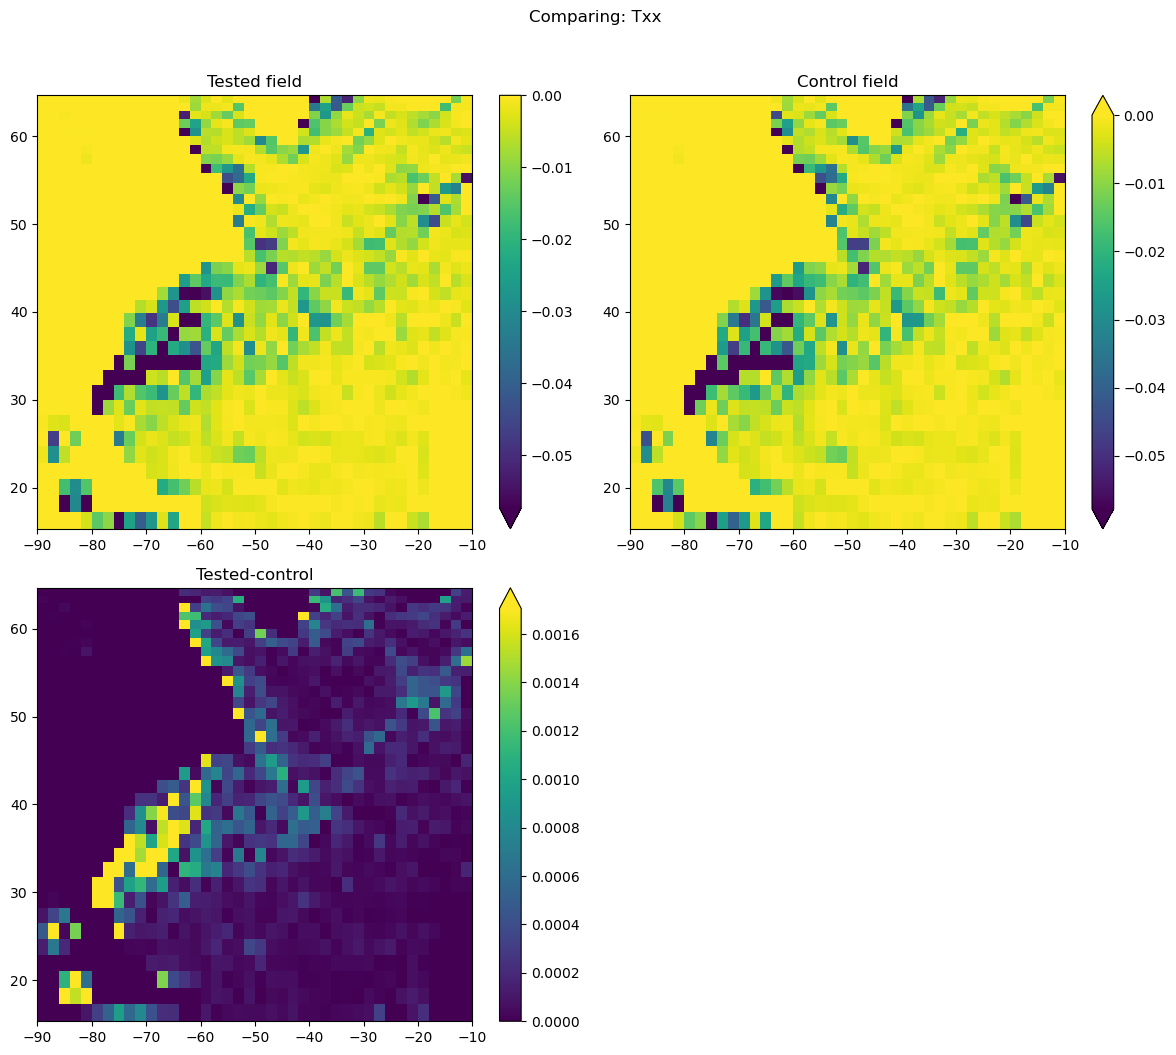

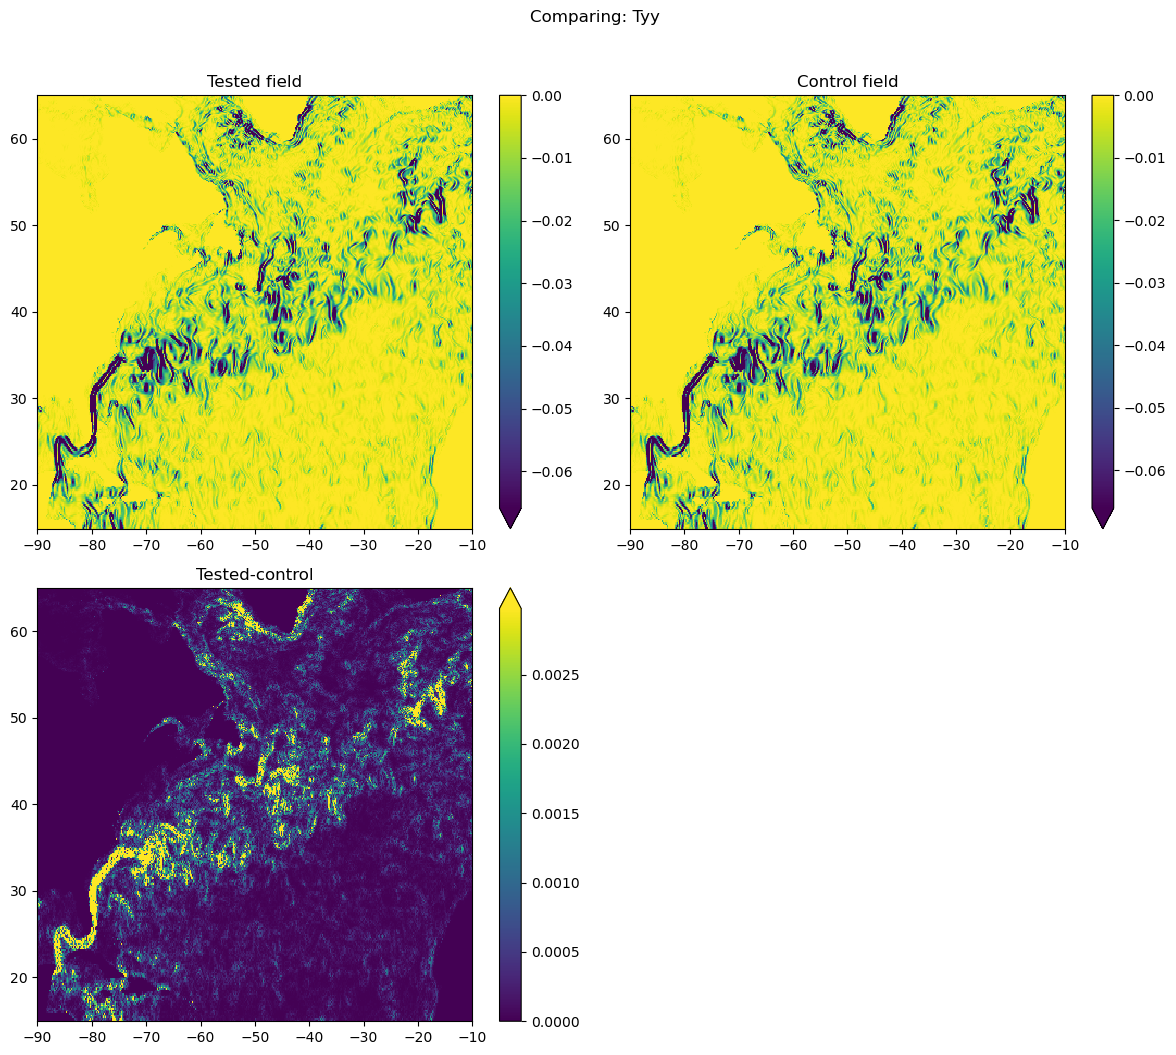

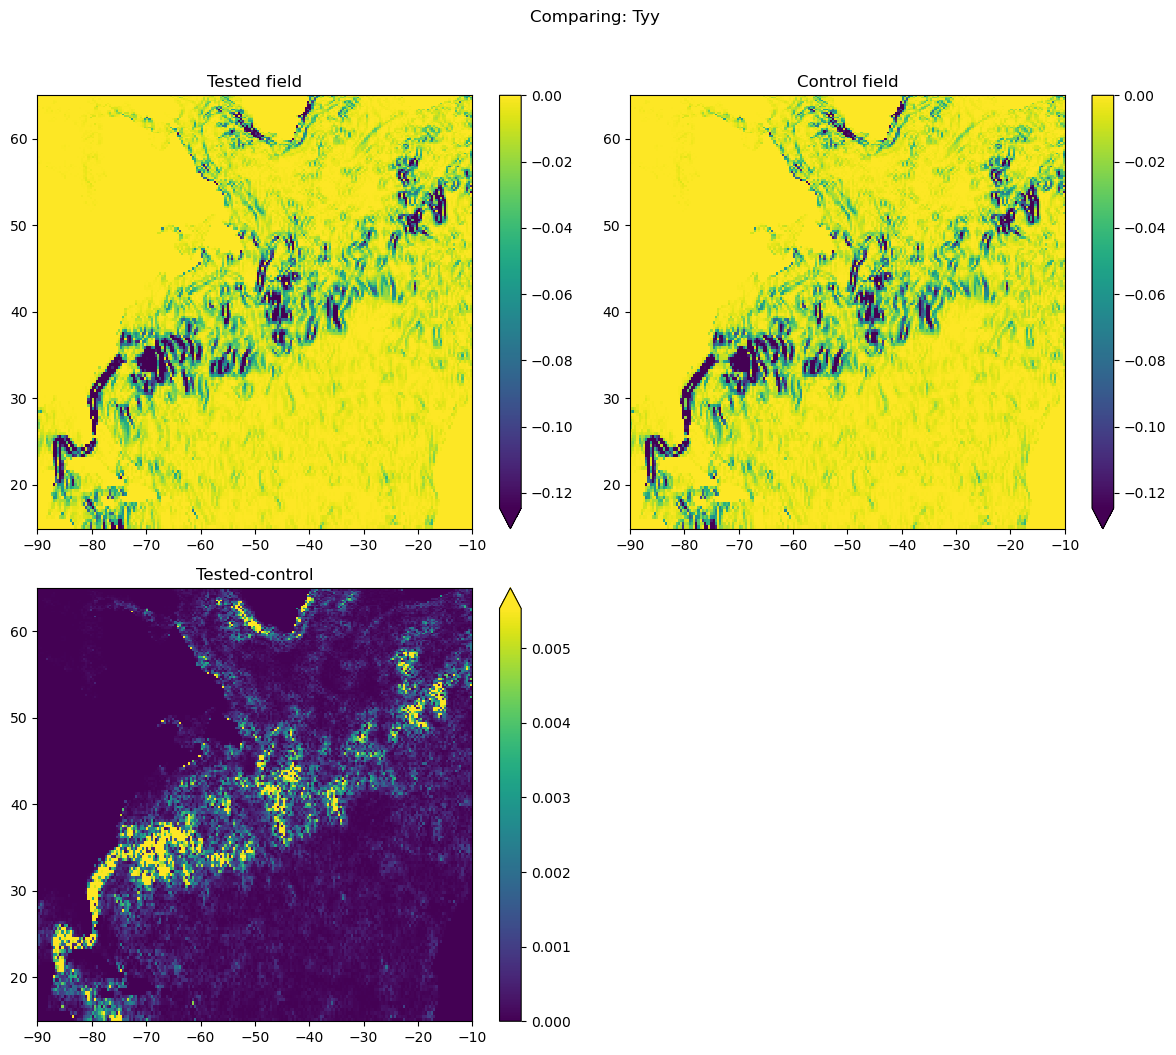

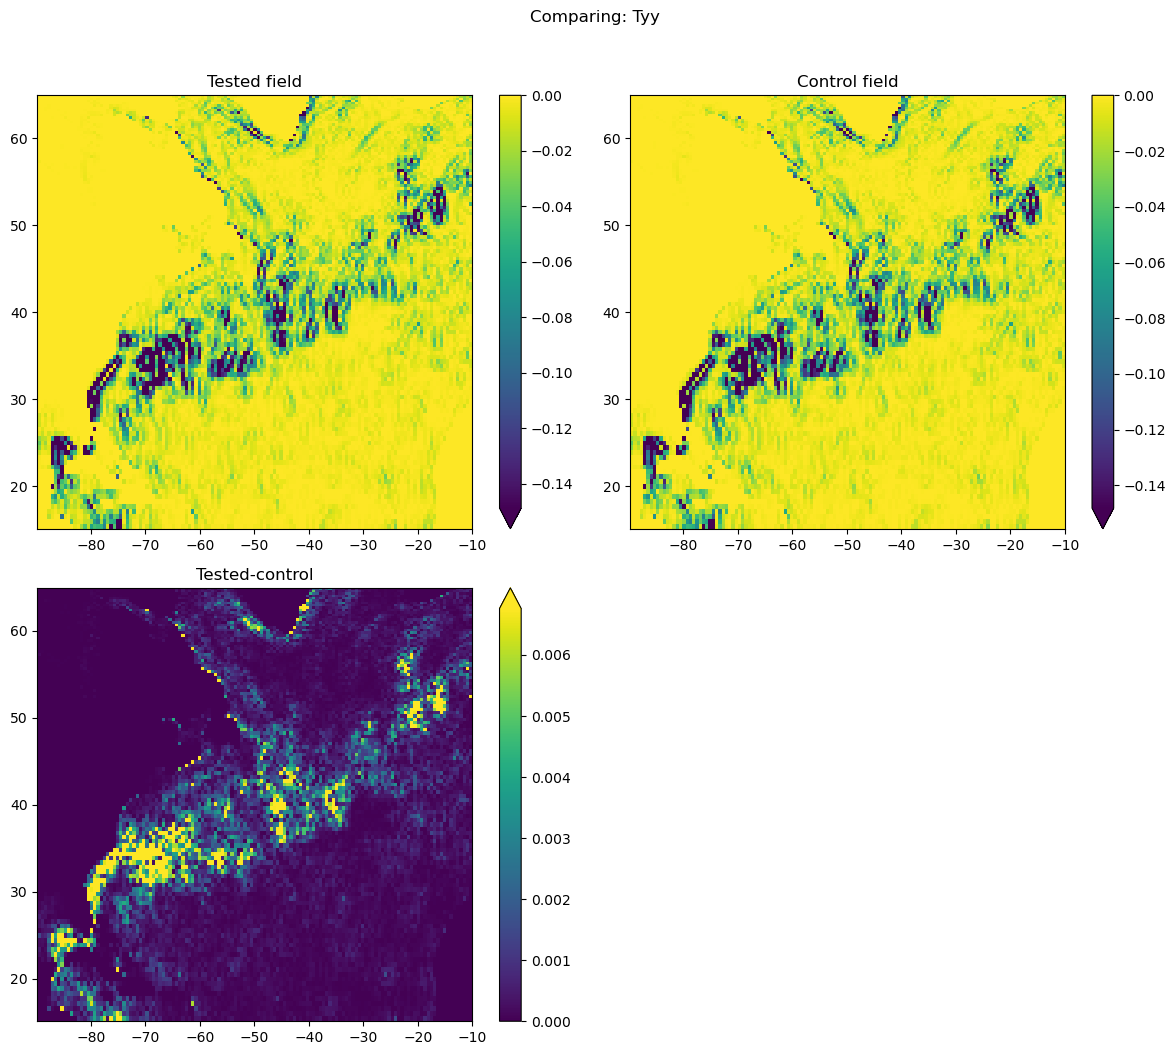

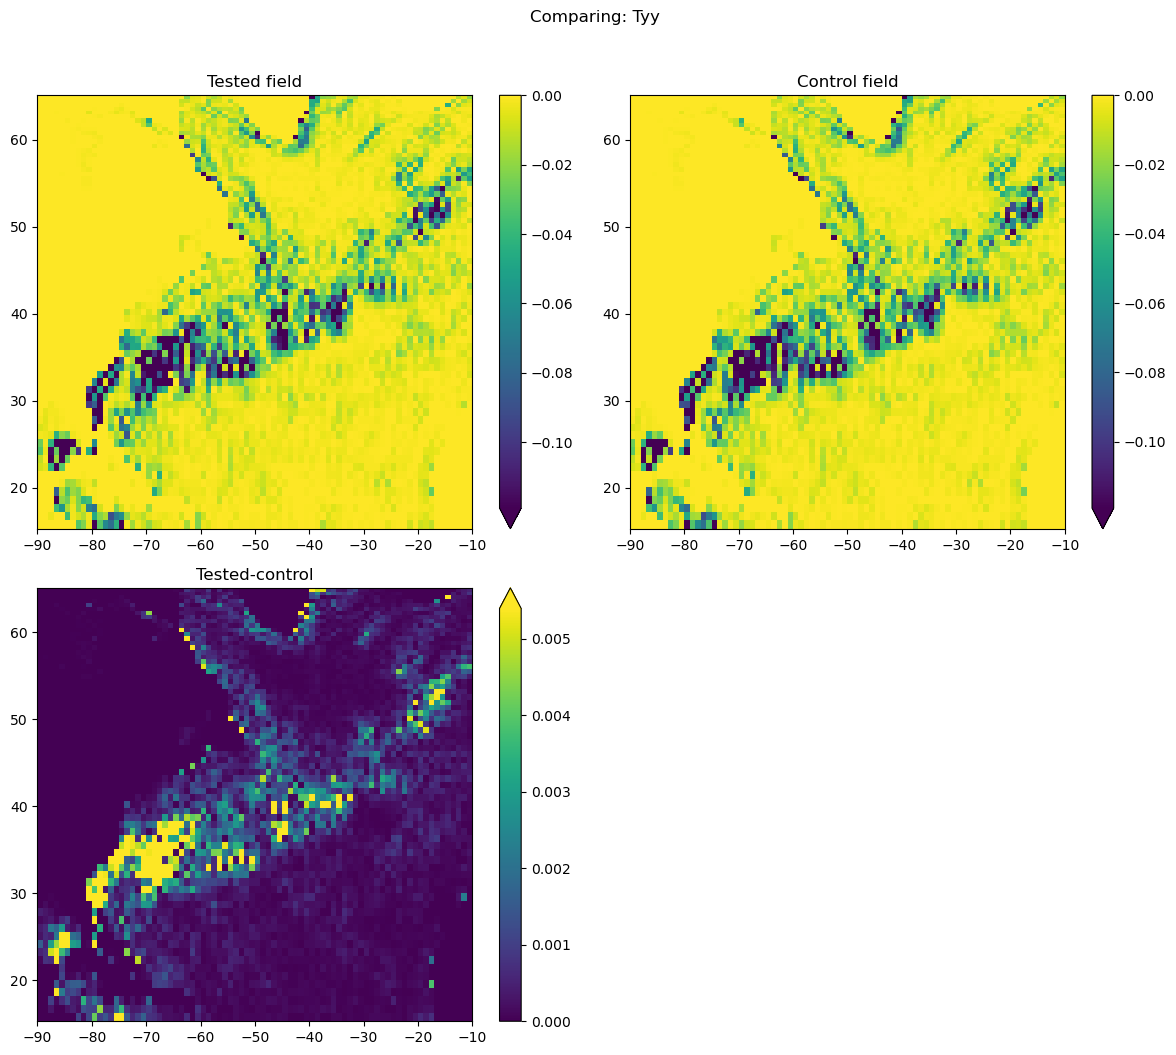

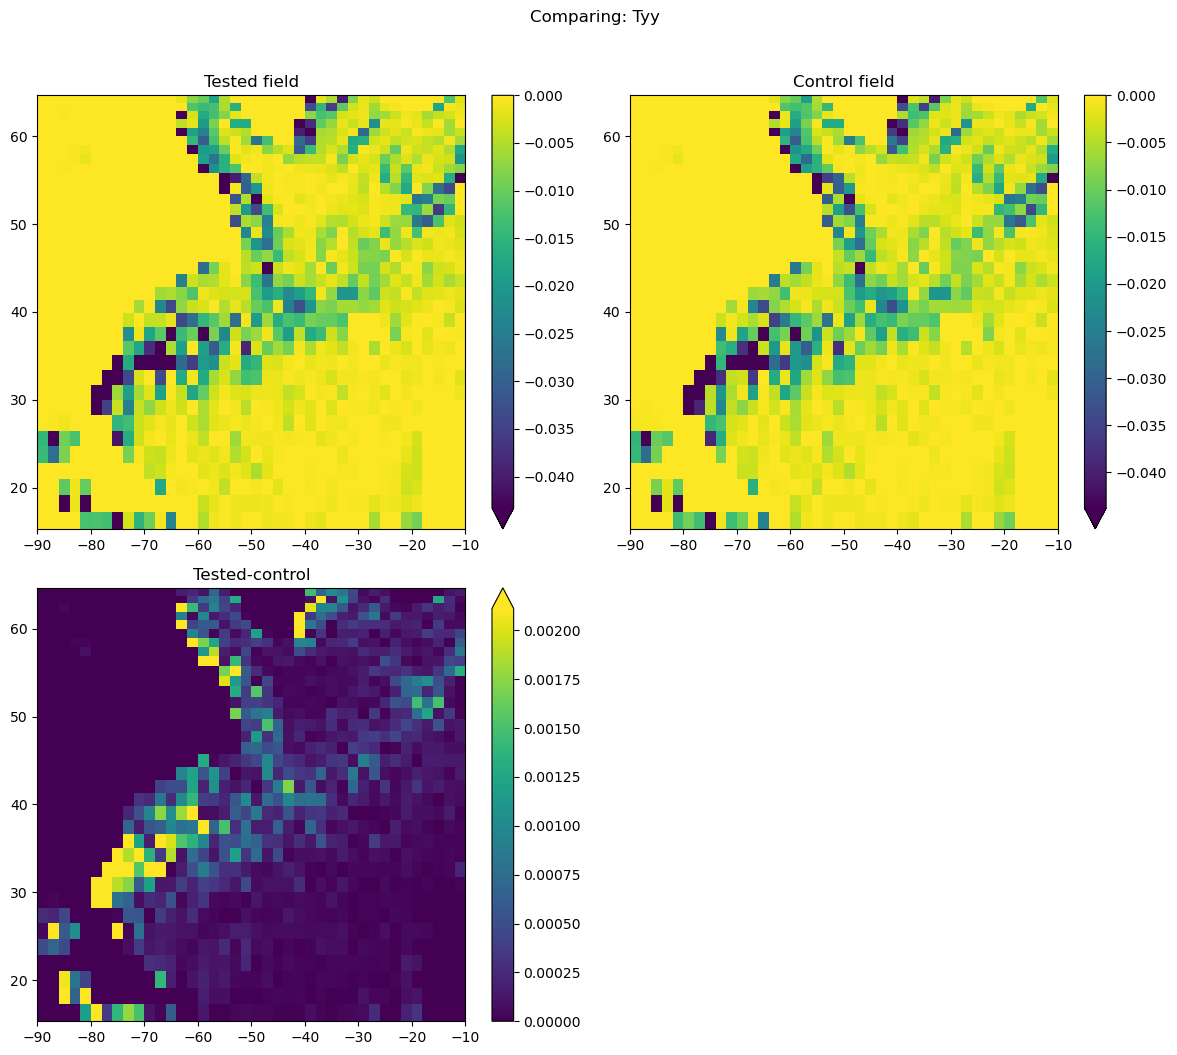

In [5]:
for key in ['Txy', 'Txx', 'Tyy']:
    for factor in [2,4,6,10,20]:
        dataset = training_dataset[factor]
        ZB = dataset.state.ZB20()
        ann = dataset.state.ANN()
        wet = dataset.param.wet_c if key == 'Txy' else dataset.param.wet
        compare(ZB[key], ann[key], wet)
        plt.suptitle(f'Comparing: {key}', y=1.05)